In [1]:
import gdown
import shutil
from astrohack import panel
import os

In [2]:
# Download VLA Holography with known panel deviationsurl = "https://drive.google.com/u/1/uc?id=10fXyut_UHPUjIuaaEy6-m6wcycZHit2v&export=download"
datafolder = "./paneldata/"
os.makedirs(name=datafolder, exist_ok=True)
panelzip = datafolder+"panel.zip"
if not os.path.exists(panelzip):
    url = "https://drive.google.com/u/1/uc?id=10fXyut_UHPUjIuaaEy6-m6wcycZHit2v&export=download"
    gdown.download(url, panelzip)
shutil.unpack_archive(filename=panelzip, extract_dir=datafolder)

In [3]:
# Declare a path to the Amplitude and Deviation images produced by AIPS
telescope = 'VLA'
# Create a new Antenna_Surface
vla = panel.Antenna_Surface(datafolder+'amp.fits',datafolder+'dev.fits',
                            telescope)

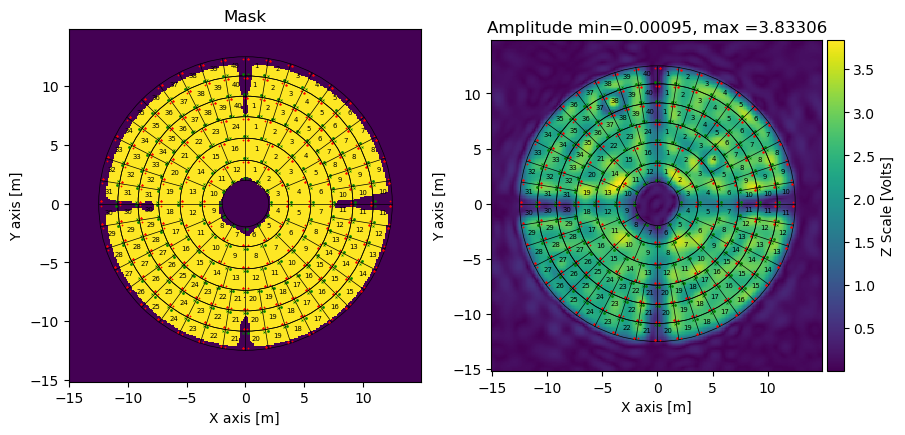

In [4]:
vla.plot_surface(mask=True,screws=True)

In [5]:
%%time
# Compile the list of points inside each panel, this is the longest step
vla.compile_panel_points()

CPU times: user 2.8 s, sys: 6.93 ms, total: 2.81 s
Wall time: 2.81 s


In [6]:
%%time
# Compile the list of points inside each panel, now using numba
vla.compile_panel_points_numba()

/export/home/figs/vdesouza/work/Holography-1022/astrohack/src/astrohack/panel.py:529: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_compile_panel_points_ringed_numba" failed type inference due to: non-precise type pyobject
During: typing of argument at /export/home/figs/vdesouza/work/Holography-1022/astrohack/src/astrohack/panel.py (531)

File "../src/astrohack/panel.py", line 531:
    def _compile_panel_points_ringed_numba(self):
        for iy in range(self.npix):
        ^

  @jit
/export/home/figs/vdesouza/work/Holography-1022/astrohack/src/astrohack/panel.py:529: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "_compile_panel_points_ringed_numba" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../src/astrohack/panel.py", line 531:
    def _compile_panel_points_ringed_numba(self):
        for iy in range(self.n

CPU times: user 4.83 s, sys: 9.46 ms, total: 4.84 s
Wall time: 4.86 s


In [7]:
%%time 
# Fit surface to get the parameters for each panel
vla.fit_surface()

CPU times: user 654 ms, sys: 929 ms, total: 1.58 s
Wall time: 437 ms


In [8]:
%%time
# Apply corrections to create a new antenna surface
vla.correct_surface()

CPU times: user 363 ms, sys: 265 ms, total: 629 ms
Wall time: 313 ms


In [9]:
# Compute the gains at a wavelenght as well as the antenna surface RMSes
ingains, ougains = vla.gains()
inrms, ourms     = vla.get_rms()
print("Gains before correction: Real: {0:7.3} dB, Theoretical: {1:7.3} dB".format(*ingains))
print("RMS before correction: {0:7.3} mm".format(inrms))
print()
print("Gains after correction: Real: {0:7.3} dB, Theoretical: {1:7.3} dB".format(*ougains))
print("RMS after correction: {0:7.3} mm".format(ourms))

Gains before correction: Real:    42.4 dB, Theoretical:    42.5 dB
RMS before correction:   0.482 mm

Gains after correction: Real:    42.4 dB, Theoretical:    42.5 dB
RMS after correction:   0.496 mm


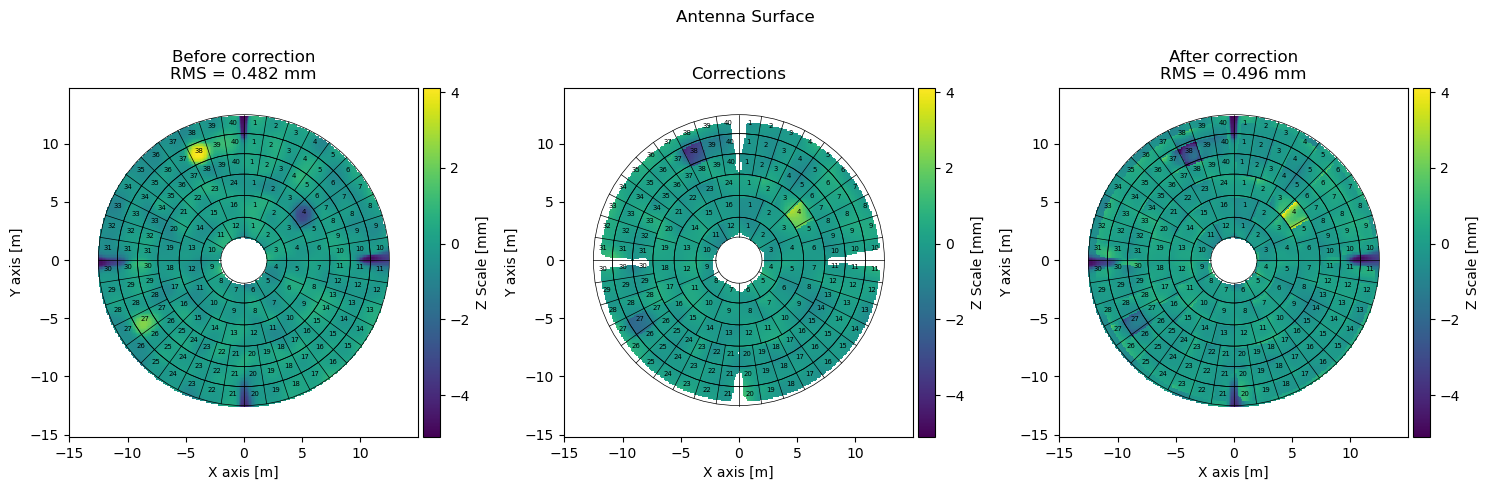

In [10]:
vla.plot_surface()

In [11]:
# Export products of the panel fitting
vla.export_screw_adjustments(datafolder+'screw-adjustments.txt',unit='miliinches')
vla.export_corrected(datafolder+'corrected-surface.fits')